## Outline

* Recap of data
* Feedforward network with Pytorch tensors and autograd
* Using Pytorch's NN -> Functional, Linear, Sequential & Pytorch's Optim
* Moving things to CUDA

In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss #log_loss - cross entropy loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [71]:
torch.manual_seed(0)

In [72]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate Dataset

In [73]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


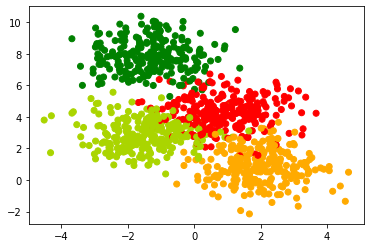

In [74]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [75]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0) 
#randomstate-fix the same data throughout the problem for all numbers 0-42
print(X_train, X_val.shape, labels.shape)

[[ 2.16429987  4.62072994]
 [ 0.15458897  8.17130474]
 [-1.05504222  9.1328021 ]
 ...
 [-2.31742704  2.01058214]
 [-2.73113913  6.52604787]
 [ 1.14294357  4.93881876]] (250, 2) (1000,)


In [76]:
Y_val

array([0, 2, 0, 3, 2, 0, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 0, 2, 3, 3, 1, 0,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 0, 2, 2, 3, 2, 0, 3, 2, 1, 1,
       2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 3, 3, 1, 2,
       1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 0, 0, 2, 3, 0, 2, 3, 1, 2, 3, 3, 0,
       3, 1, 2, 2, 2, 3, 3, 1, 2, 2, 0, 3, 1, 3, 1, 3, 3, 1, 1, 0, 1, 0,
       1, 0, 3, 3, 2, 3, 3, 2, 1, 1, 3, 3, 1, 1, 3, 2, 2, 2, 3, 0, 2, 1,
       1, 0, 0, 0, 3, 0, 3, 1, 2, 3, 1, 0, 2, 2, 3, 2, 1, 0, 1, 3, 1, 0,
       2, 0, 3, 3, 0, 0, 1, 2, 3, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 1,
       1, 0, 3, 1, 1, 3, 2, 0, 1, 3, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 3, 3,
       1, 0, 1, 3, 0, 0, 1, 0, 1, 2, 1, 3, 0, 2, 0, 1, 3, 0, 2, 3, 2, 3,
       2, 3, 1, 0, 3, 3, 1, 2, 2, 3, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 2, 1, 2, 3])

## Using torch tensors and autograd

In [77]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [78]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [79]:
#why unsqueeze is used
a= torch.rand(2,4)
print(a)
print(a.exp().sum(-1))
print(a.exp().sum(-1).shape)
print(a.exp().sum(-1).unsqueeze(-1))
print(a.exp().sum(-1).unsqueeze(-1).shape) # -1 always indicate last axis

tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964]])
tensor([6.0321, 7.3285])
torch.Size([2])
tensor([[6.0321],
        [7.3285]])
torch.Size([2, 1])


In [80]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  
  #softmax function
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4) sum(0) - add col wise , sum(1) - add row wise , sum(-1) - summing up only last axis row wise
  return h2

Multiclassification model

In [81]:

y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0]) #indicating index 2 - 0.3 , 0 - 0.8

#cross entropy loss
print(y_hat.shape[0]) # 2
print(y_hat.shape[1])
print(y_hat[range(y_hat.shape[0]), y]) #range(y_hat.shape[0])= from 0 to 1  i.e  [0,2] = 0.3 and [1,0] = 0.8
print((-y_hat[range(y_hat.shape[0]), y].log()).mean())
print((-y_hat[range(y_hat.shape[0]), y].log()).mean().item())  , #.item - convert scalar values


#accuracy
print('\n')
print(torch.argmax(y_hat, dim=1)) # argmax = return max index
print((torch.argmax(y_hat, dim=1) == y)) 
(torch.argmax(y_hat, dim=1) == y).float().mean().item()

2
4
tensor([0.3000, 0.8000])
tensor(0.7136)
0.7135581970214844


tensor([3, 0])
tensor([False,  True])


0.5

In [82]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [83]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

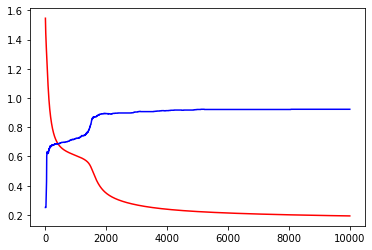

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788
[1.5456441640853882, 1.5324405431747437, 1.5204744338989258, 1.5095365047454834, 1.499459981918335, 1.4901087284088135, 1.4813734292984009, 1.4731632471084595, 1.4654033184051514, 1.4580320119857788, 1.45099675655365, 1.4442534446716309, 1.437764048576355, 1.4314974546432495, 1.4254262447357178, 1.4195261001586914, 1.413775086402893, 1.4081577062606812, 1.4026561975479126, 1.3972569704055786, 1.3919486999511719, 1.3867192268371582, 1.3815597295761108, 1.3764609098434448, 1.3714150190353394, 1.3664162158966064, 1.3614572286605835, 1.3565332889556885, 1.3516391515731812, 1.3467708826065063, 1.3419245481491089, 1.3370965719223022, 1.3322842121124268, 1.3274844884872437, 1.3226958513259888, 1.3179157972335815, 1.313143253326416, 1.308376431465149, 1.3036144971847534, 1.2988566160202026, 1.2941021919250488, 1.2893508672714233, 1.284602403640747, 1.2798569202423096, 1.2751142978668213, 1.2703745365142822, 1.26563

In [84]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item()) #.item - convert scalar values
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])
print(loss_arr)

## Using NN.Functional

In [85]:
import torch.nn.functional as F

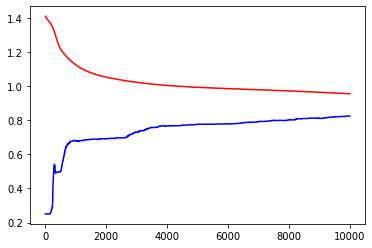

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [86]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.Parameter

In [87]:
import torch.nn as nn

In [88]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
    
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [89]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train) #execute forward
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      #shorthand of parameter
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

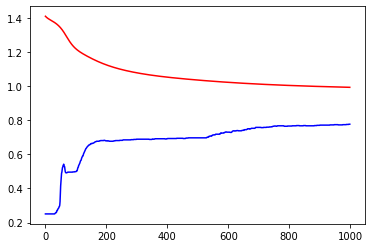

Loss before training 1.4111980199813843
Loss after training 0.9939236640930176


In [90]:
fn = FirstNetwork()
fit()

## Using NN.Linear and Optim

In [91]:
class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2) # automatically have weight and bias
    self.lin2 = nn.Linear(2, 4) #we don't have initialize weight and bias
    
  def forward(self, X):
    a1 = self.lin1(X) #torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

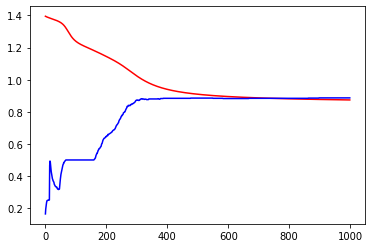

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [92]:
fn = FirstNetwork_v1()
fit()

In [93]:
from torch import optim

In [94]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

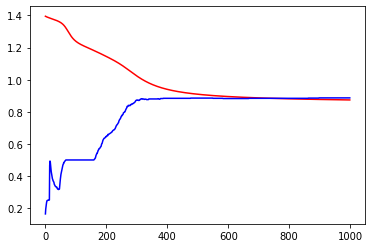

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [95]:
fn = FirstNetwork_v1()
fit_v1()

## Using NN.Sequential

In [96]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

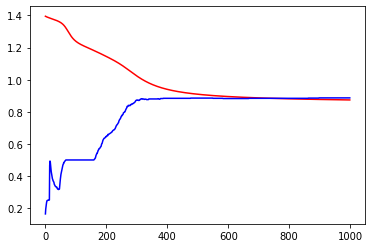

Loss before training 1.395160436630249
Loss after training 0.8738409876823425


In [97]:
fn = FirstNetwork_v2()
fit_v1()

In [98]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()

In [99]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738409876823425

## Running it on GPUs

In [100]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 1.035264015197754


In [101]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4), 
        nn.Sigmoid(), 
        nn.Linear(1024*4, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [103]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890228271484375
Time taken 2.4811458587646484


## Exercises

1. Try out a deeper neural network, eg. 2 hidden layers
2. Try out different parameters in the optimizer (eg. try momentum, nestrov) -> check `optim.SGD` docs
3. Try out other optimization methods (eg. RMSProp and Adam) which are supported in `optim`
4. Try out different initialisation methods which are supported in `nn.init` 